In [78]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt



In [79]:
# Load dataset

df = pd.read_csv("../data/Train.csv")

In [80]:
# Quick Look at the data

df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [81]:
# Check structure 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [82]:
df.shape

(10999, 12)

In [83]:
# Summary statistics

df.describe(include="all") 

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
count   10999.00000           10999            10999         10999.000000   
unique          NaN               5                3                  NaN   
top             NaN               F             Ship                  NaN   
freq            NaN            3666             7462                  NaN   
mean     5500.00000             NaN              NaN             4.054459   
std      3175.28214             NaN              NaN             1.141490   
min         1.00000             NaN              NaN             2.000000   
25%      2750.50000             NaN              NaN             3.000000   
50%      5500.00000             NaN              NaN             4.000000   
75%      8249.50000             NaN              NaN             5.000000   
max     10999.00000             NaN              NaN             7.000000   

        Customer_rating  Cost_of_the_Product  Prior_purchases  \
count      10999.000000         10999.000000     10999.000000   
unique              NaN                  NaN              NaN   
top                 NaN                  NaN              NaN   
freq                NaN                  NaN              NaN   
mean           2.990545           210.196836         3.567597   
std            1.413603            48.063272         1.522860   
min            1.000000            96.000000         2.000000   
25%            2.000000           169.000000         3.000000   
50%            3.000000           214.000000         3.000000   
75%            4.000000           251.000000         4.000000   
max            5.000000           310.000000        10.000000   

       Product_importance Gender  Discount_offered  Weight_in_gms  \
count               10999  10999      10999.000000   10999.000000   
unique                  3      2               NaN            NaN   
top                   low      F               NaN            NaN   
freq                 5297   5545               NaN            NaN   
mean                  NaN    NaN         13.373216    3634.016729   
std                   NaN    NaN         16.205527    1635.377251   
min                   NaN    NaN          1.000000    1001.000000   
25%                   NaN    NaN          4.000000    1839.500000   
50%                   NaN    NaN          7.000000    4149.000000   
75%                   NaN    NaN         10.000000    5050.000000   
max                   NaN    NaN         65.000000    7846.000000   

        Reached.on.Time_Y.N  
count          10999.000000  
unique                  NaN  
top                     NaN  
freq                    NaN  
mean               0.596691  
std                0.490584  
min                0.000000  
25%                0.000000  
50%                1.000000  
75%                1.000000  
max                1.000000

In [84]:
# Missing values

df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [85]:
# Duplicate rows

df.duplicated().sum()

np.int64(0)

# 1- Load pandas as pd
# import pandas as pd

# df = pd.read_csv("../data/Train.csv")

# 2- peek at data
# df.head()
# df.info()
# df.describe(include="all")
# df.isnull().sum()
# df.duplicated().sum()

In [86]:
# Added 
# import seaborn as sns
# import matplotlib.pyplot as plt
# barplot

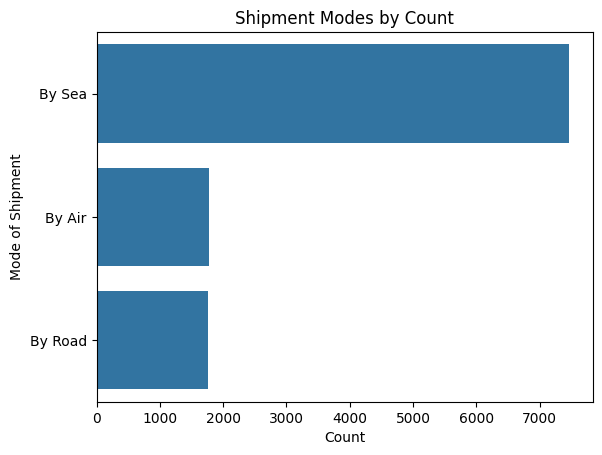

In [87]:
mode_mapping ={
    "Flight": "By Air",
    "Ship": "By Sea",
    "Road": "By Road"
}

df['Mode_of_Shipment'] = df['Mode_of_Shipment'].replace(mode_mapping)

top_carriers = df['Mode_of_Shipment'].value_counts().head(10)

sns.countplot(data=df, y="Mode_of_Shipment", order=df["Mode_of_Shipment"].value_counts().index)
              
plt.title("Shipment Modes by Count")
plt.xlabel("Count"); plt.ylabel("Mode of Shipment")
plt.ylabel("Mode of Shipment")


plt.savefig("../reports/shipment_modes.png", dpi=300, bbox_inches="tight")
plt.show()

### Bar Plot: Shipment Modes
# Why: To understand which shipment mode is most frequently used.  
# How: Replaced raw labels (Flight, Ship, Road) with descriptive labels (By Air, By Sea, By Road) and plotted their frequencies.  
# What I See: By far the most common mode of shipment is By Sea, followed by By Air and By Road.  
# Next Question**: Do delivery delays or customer ratings differ depending on the shipment mode?



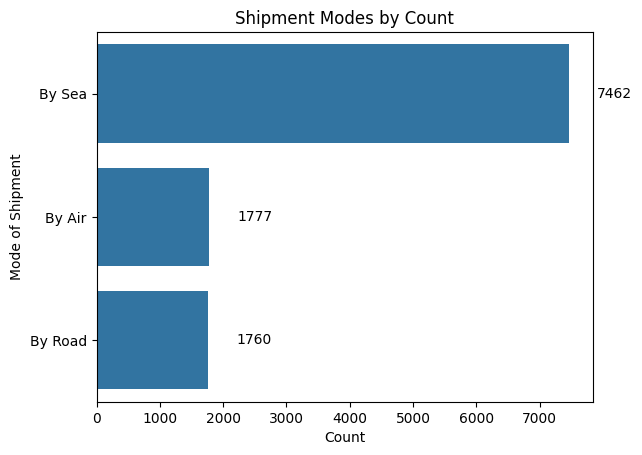

In [88]:
# Optional: relabel for clarify

mode_map = {"Flight": "By Air", "Ship": "By Sea", "Road": "By Road"}
df["Mode_of_Shipment"] = df["Mode_of_Shipment"].replace(mode_map)

counts = df["Mode_of_Shipment"].value_counts()
ax = sns.barplot(x=counts.values, y=counts.index)
ax.set_title("Shipment Modes by Count")
ax.set_xlabel("Count"); ax.set_ylabel("Mode of Shipment")

# Add number labels at the end of each bar

for i, v in enumerate(counts.values):
    ax.text(v + counts.max()*0.06, i, str(v), va="center")
    
    
plt.savefig("../reports/plots/01_shipment_modes.png", dpi=300, bbox_inches="tight")
plt.show()



# Notebook note (example):
# What I did: Counted shipments by transport mode.
# Why: To see which transport is used most.
# Insight: “By Sea” dominates; “By Air” and “By Road” are much smaller.

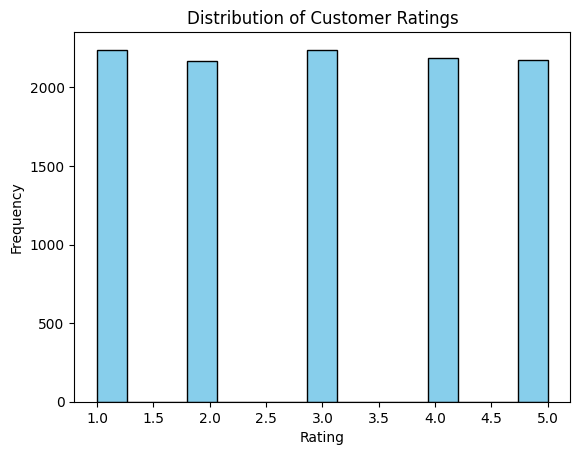

In [89]:


plt.hist(df['Customer_rating'], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

plt.savefig("../reports/plots/02_customer_rating_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


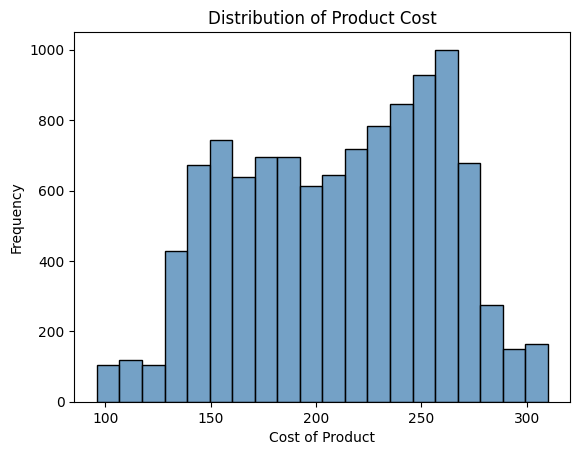

In [90]:
sns.histplot(df["Cost_of_the_Product"], bins=20, color="steelblue", edgecolor="black", kde=False)
plt.title("Distribution of Product Cost")
plt.xlabel("Cost of Product")
plt.ylabel("Frequency")

plt.savefig("../reports/plots/03_product_cost_distribution.png", dpi=300, bbox_inches="tight")

plt.show()

# Histogram: Product Cost
# Why**: To understand the range and distribution of product prices.
# How**: Plotted a histogram of `Cost_of_the_Product` with 20 bins.
# What I see: Most products cost between 150–250, with fewer at the very low (100–130) and high (280–310) ranges.
# Next Question**: Do higher-cost products experience more delays or receive higher/lower discounts?

C:\Users\jblev\AppData\Local\Temp\ipykernel_19340\2104429942.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Customer_rating", data=df, palette="Blues")


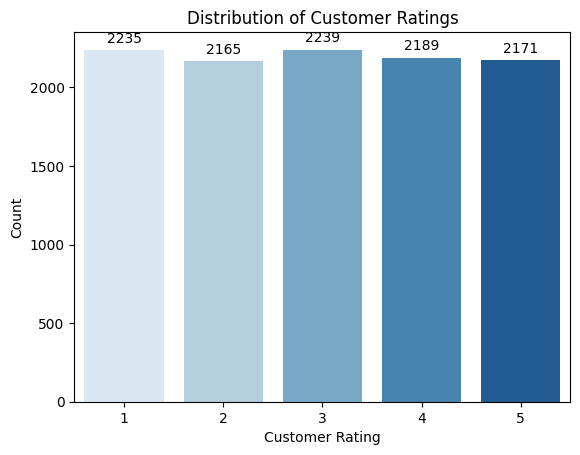

In [91]:
ax = sns.countplot(x="Customer_rating", data=df, palette="Blues")
ax.set_title("Distribution of Customer Ratings")
ax.set_xlabel("Customer Rating")
ax.set_ylabel("Count")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, 
            p.get_height() + 50, 
            int(p.get_height()), 
            ha="center")
    
plt.savefig("../reports/plots/04_customer_rating_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


# Histogram: Customer Ratings
# Why: To see how customers rate courier services (scale 1–5).  
# How: Counted ratings and plotted as bars. Added labels for clarity.  
# What I see: Ratings are fairly evenly spread, with each category having ~2,200 responses. No clear bias toward positive or negative ratings.  
# Next Question: Does rating vary by shipment mode (e.g., are "By Air" shipments rated better than "By Sea")?

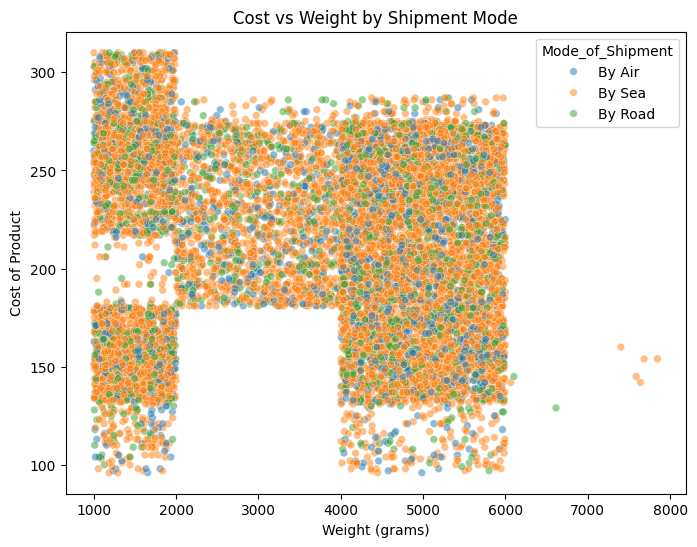

In [92]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Weight_in_gms",
    y="Cost_of_the_Product",
    hue="Mode_of_Shipment",
    alpha=0.5,
    s=30
)

plt.title("Cost vs Weight by Shipment Mode")
plt.xlabel("Weight (grams)")
plt.ylabel("Cost of Product")

plt.savefig("../reports/plots/05_cost_vs_weight.png", dpi=300, bbox_inches="tight")
plt.show()
 


# Scatter Plot: Cost vs Weight
# Why: To check if heavier products tend to cost more, and whether shipment mode has any effect.  
# How: Plotted product weight (x-axis) against cost (y-axis), with colors for shipment mode.  
# What I see: Costs are spread fairly evenly between $100–$300 regardless of weight. No clear linear relationship. Shipment mode (Air, Sea, Road) does not appear to strongly influence cost.  
# Next Question: Do discounts depend more on product weight than cost? Or do certain shipment modes handle heavier items differently?

C:\Users\jblev\AppData\Local\Temp\ipykernel_19340\3499566787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Mode_of_Shipment", y="Discount_offered", palette="Set2")


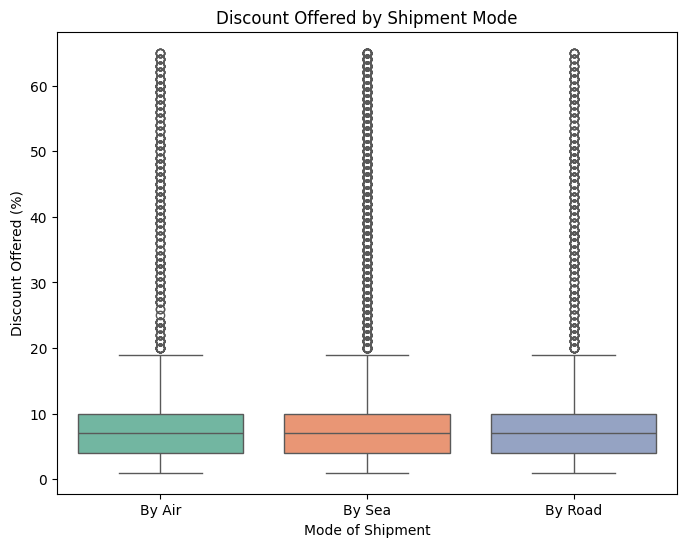

In [93]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Mode_of_Shipment", y="Discount_offered", palette="Set2")
plt.title("Discount Offered by Shipment Mode")
plt.xlabel("Mode of Shipment")
plt.ylabel("Discount Offered (%)")

plt.savefig("../reports/plots/06_discounts_by_mode.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\jblev\AppData\Local\Temp\ipykernel_19340\3265373091.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Mode_of_Shipment", y="Customer_care_calls", palette="Set3")


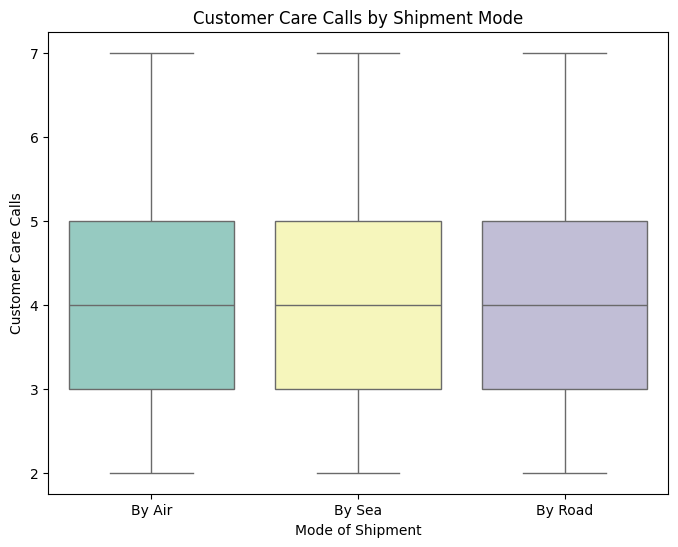

In [94]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Mode_of_Shipment", y="Customer_care_calls", palette="Set3")
plt.title("Customer Care Calls by Shipment Mode")
plt.xlabel("Mode of Shipment")
plt.ylabel("Customer Care Calls")

plt.savefig("../reports/plots/07_calls_by_mode.png", dpi=300, bbox_inches="tight")
plt.show()

# Boxplot: Customer Care Calls by Shipment Mode

# Why: To check if certain shipping methods cause more customer service interactions.

# How: Created a boxplot of Customer_care_calls grouped by Mode_of_Shipment.

# What I see: The median is consistently 4 calls across all modes. The spread is also
# nearly identical (2-7 calls). This suggests that shipment mode does not significantly
# impact the number of customer service calls.

# Next Question: Are higher call volumes related more to delivery delays (on-time vs
# late) than to shipment mode?

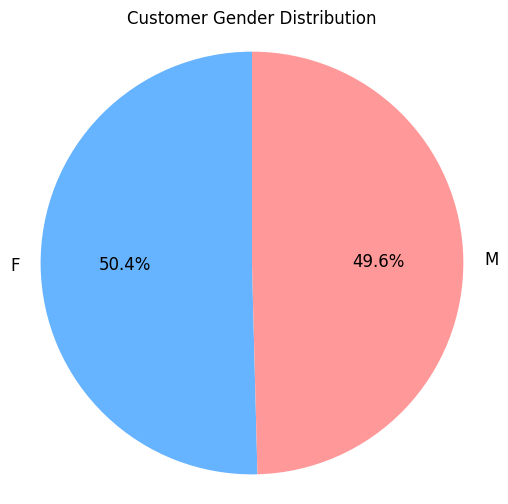

In [95]:
gender_counts = df["Gender"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66b3ff", "#ff9999"], 
    textprops={"fontsize": 12}
)
plt.title("Customer Gender Distribution")
plt.axis("equal") 


plt.savefig("../reports/plots/08_gender_distribution.png", dpi=300, bbox_inches="tight")
plt.show()
                                          

# Pie Chart: Gender Distribution
# Why: To check whether male and female customers are equally represented.  
# How: Plotted a pie chart of `Gender` counts.  
# What I see: The dataset is nearly evenly split: 50.4% female and 49.6% male. This means gender will not strongly bias shipment analysis.  
# Next Question: Does gender correlate with shipment mode preference or product importance?


C:\Users\jblev\AppData\Local\Temp\ipykernel_19340\3192906528.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="_OnTime", palette="pastel")


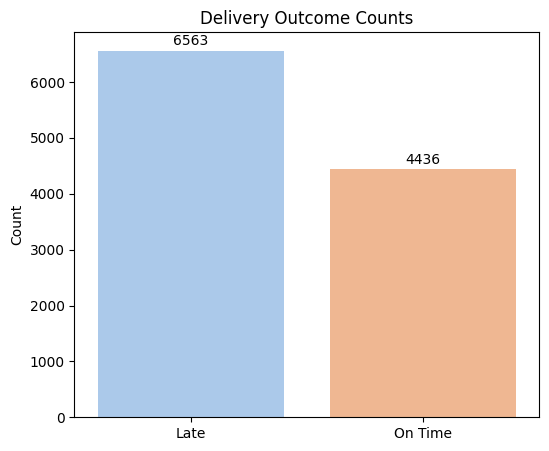

In [96]:
# Map to readable labels 

df["_OnTime"] = df["Reached.on.Time_Y.N"].map({0: "On Time", 1: "Late"})

plt.figure(figsize=(6,5))
ax = sns.countplot(data=df, x="_OnTime", palette="pastel")

# Add title/labels
ax.set_title("Delivery Outcome Counts")
ax.set_xlabel("")
ax.set_ylabel("Count")

# Add lables

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, 
            p.get_height() + 100, 
            int(p.get_height()), 
            ha="center")
    
plt.savefig("../reports/plots/09_delivery_outcomes.png", dpi=300, bbox_inches="tight")
plt.show()
                       

# Count Plot: Delivery Outcomes
# Why: To measure delivery performance (on-time vs late).  
# How: Mapped `Reached.on.Time_Y.N` into "On Time" and "Late". Counted each outcome.  
# What I see: Only ~60% of shipments are on time, while ~40% are late.  
# Next Question: Which factors (shipment mode, product weight, cost, discount) influence late deliveries most strongly?
